<a href="https://colab.research.google.com/github/jdmartinev/ArtificialIntelligenceIM/blob/main/Lecture04/notebooks/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

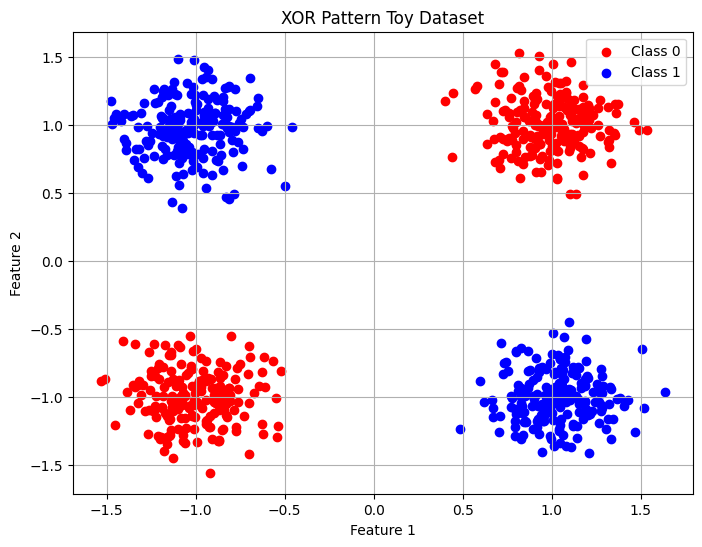

In [32]:
# Generate the XOR pattern data
def generate_xor_data(n_samples_per_cluster, lower_bound, upper_bound, noise):
    np.random.seed(0)
    X = []
    y = []
    # Define the four corners of the XOR pattern
    corners = [(-1, -1), (-1, 1), (1, -1), (1, 1)]
    labels = [0, 1, 1, 0]

    for corner, label in zip(corners, labels):
        for _ in range(n_samples_per_cluster):
            point = np.array(corner) + np.random.normal(0, noise, 2)
            X.append(point)
            y.append(label)

    X = np.array(X)
    y = np.array(y)
    return X, y

# Parameters
n_samples_per_cluster = 50
lower_bound = -2
upper_bound = 2
noise = 0.2  # Reduce noise

# Parameters
n_samples = 200
lower_bound = -2
upper_bound = 2
noise = 0.2

# Generate data
X, y = generate_xor_data(n_samples, lower_bound, upper_bound, noise)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('XOR Pattern Toy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
W = np.array([[-1,1], [1,-1]])
b = np.array([-1,-1]).reshape(-1,1)
print(W.shape, b.shape)

(2, 2) (2, 1)


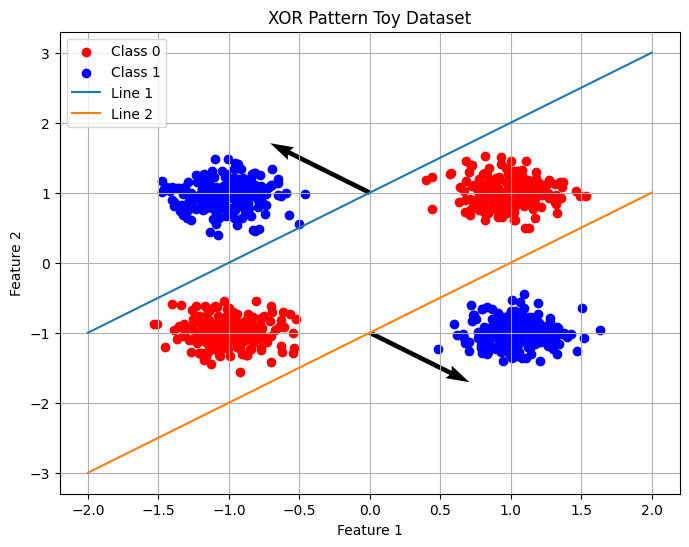

In [34]:
# Plot lines corresponding to W and b
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

x_vals = np.linspace(-2, 2, 400)
for i in range(W.shape[1]):
    w = W[:, i]
    b_i = b[i]
    y_vals = (-w[0] * x_vals - b_i) / w[1]
    plt.plot(x_vals, y_vals, label=f'Line {i+1}')

    # Calculate the midpoint for the normal vector
    midpoint = np.array([0, -b_i[0] / w[1]])

    # Normalize the normal vector
    norm_vector = w / np.linalg.norm(w)

    # Plot the normal vector
    plt.quiver(midpoint[0], midpoint[1], norm_vector[0], norm_vector[1],
               angles='xy', scale_units='xy', scale=1, color='black')


plt.title('XOR Pattern Toy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
Z = X @ W + np.ones((X.shape[0],1))@b.T
Z1 =  X @ W + np.squeeze(b)
print(Z.shape,Z1.shape)

(800, 2) (800, 2)


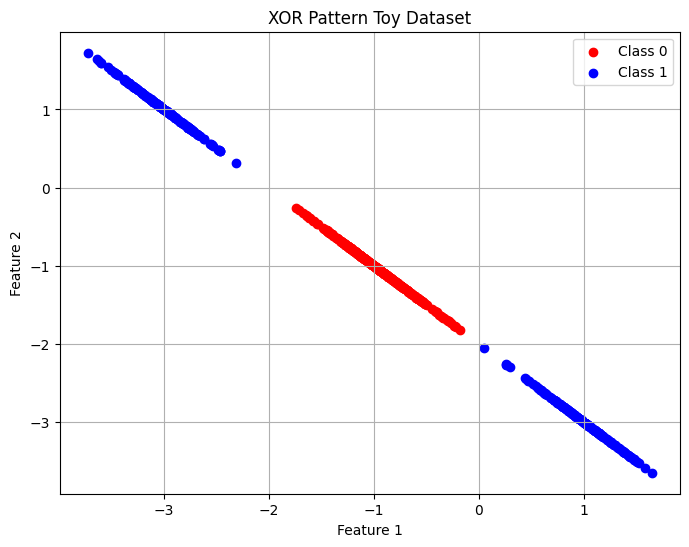

In [36]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(Z[y == 0][:, 0], Z[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(Z[y == 1][:, 0], Z[y == 1][:, 1], color='blue', label='Class 1')
plt.title('XOR Pattern Toy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
A = np.maximum(0,Z)
print(A.shape)

(800, 2)


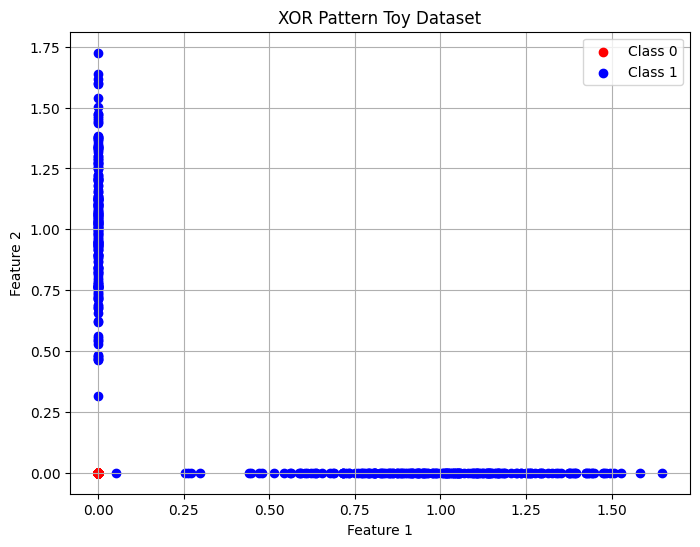

In [38]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(A[y == 0][:, 0], A[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(A[y == 1][:, 0], A[y == 1][:, 1], color='blue', label='Class 1')
plt.title('XOR Pattern Toy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()